In [1]:
import numpy as np
import pandas as pd

In [2]:
# import the csv file with raw data for grades of students

df_grades = pd.read_csv("https://people.sc.fsu.edu/~jburkardt/data/csv/grades.csv")

In [3]:
# Creates new 'clean' names for columns that don't have quotation marks surrounding them

columns_grades = ['LastName', 'FirstName','SSN','Test1', 
                  'Test2','Test3', 'Test4','Final','Grade']

df_grades.columns = columns_grades

In [4]:
df_grades.head(6)

,LastName,FirstName,SSN,Test1,Test2,Test3,Test4,Final,Grade
0,Alfalfa,"""Aloysius""","""123-45-6789""",40.0,90.0,100.0,83.0,49.0,"""D-"""
1,Alfred,"""University""","""123-12-1234""",41.0,97.0,96.0,97.0,48.0,"""D+"""
2,Gerty,"""Gramma""","""567-89-0123""",41.0,80.0,60.0,40.0,44.0,"""C"""
3,Android,"""Electric""","""087-65-4321""",42.0,23.0,36.0,45.0,47.0,"""B-"""
4,Bumpkin,"""Fred""","""456-78-9012""",43.0,78.0,88.0,77.0,45.0,"""A-"""
5,Rubble,"""Betty""","""234-56-7890""",44.0,90.0,80.0,90.0,46.0,"""C-"""


In [5]:
# Cleaning FirstName column to remove spaces and quotations

df_grades['FirstName'] = df_grades.FirstName.str.strip(' "')

In [6]:
df_grades.FirstName.unique()

array(['Aloysius', 'University', 'Gramma', 'Electric', 'Fred', 'Betty',
       'Cecil', 'Bif', 'Andrew', 'Jim', 'Art', 'Ima', 'Benny', 'Boy',
       'Harvey'], dtype=object)

In [7]:
# Cleaning SSN column to remove spaces and quotations

df_grades['SSN'] = df_grades.SSN.str.strip(' "')

In [8]:
# Cleaning Grade column to remove spaces and quotations

df_grades['Grade'] = df_grades.Grade.str.strip(' "')

In [9]:
df_grades.head()

,LastName,FirstName,SSN,Test1,Test2,Test3,Test4,Final,Grade
0,Alfalfa,Aloysius,123-45-6789,40.0,90.0,100.0,83.0,49.0,D-
1,Alfred,University,123-12-1234,41.0,97.0,96.0,97.0,48.0,D+
2,Gerty,Gramma,567-89-0123,41.0,80.0,60.0,40.0,44.0,C
3,Android,Electric,087-65-4321,42.0,23.0,36.0,45.0,47.0,B-
4,Bumpkin,Fred,456-78-9012,43.0,78.0,88.0,77.0,45.0,A-


In [10]:
# Cleaning Test1 column to remove spaces

df_grades['Test1'] = df_grades.Test1.str.strip('')

In [16]:
df_grades.loc[8,'Test1'] = 49.0

In [18]:
# Cleaning Test1 column so values are floats instead of strings

df_grades['Test1'] = pd.to_numeric(df_grades.Test1)

In [19]:
# Creating new column to just be the 'plus' or 'minus' of the final grade
df_grades['ScaleGrade'] = df_grades.Grade.str[1]

In [20]:
# Creating new column to just be the alphabetical final grade

df_grades.insert(9, 'LetterGrade', df_grades.Grade.str[0])

In [21]:
# Deleting now redundant Grade column

del df_grades['Grade']

In [22]:
df_grades.head(6)

,LastName,FirstName,SSN,Test1,Test2,Test3,Test4,Final,LetterGrade,ScaleGrade
0,Alfalfa,Aloysius,123-45-6789,40.0,90.0,100.0,83.0,49.0,D,-
1,Alfred,University,123-12-1234,41.0,97.0,96.0,97.0,48.0,D,+
2,Gerty,Gramma,567-89-0123,41.0,80.0,60.0,40.0,44.0,C,NaN
3,Android,Electric,087-65-4321,42.0,23.0,36.0,45.0,47.0,B,-
4,Bumpkin,Fred,456-78-9012,43.0,78.0,88.0,77.0,45.0,A,-
5,Rubble,Betty,234-56-7890,44.0,90.0,80.0,90.0,46.0,C,-


In [23]:
df_grades.groupby("LetterGrade").mean().head(1)

,Test1,Test2,Test3,Test4
LetterGrade,,,,
A,45.5,39.5,92.5,86.5


In [24]:
df_grades.iloc[8,7] = ""

In [25]:
df_grades.Final = pd.to_numeric(df_grades.Final)

In [26]:
df_grades

,LastName,FirstName,SSN,Test1,Test2,Test3,Test4,Final,LetterGrade,ScaleGrade
0,Alfalfa,Aloysius,123-45-6789,40.0,90.0,100.0,83.0,49.0,D,-
1,Alfred,University,123-12-1234,41.0,97.0,96.0,97.0,48.0,D,+
2,Gerty,Gramma,567-89-0123,41.0,80.0,60.0,40.0,44.0,C,NaN
3,Android,Electric,087-65-4321,42.0,23.0,36.0,45.0,47.0,B,-
4,Bumpkin,Fred,456-78-9012,43.0,78.0,88.0,77.0,45.0,A,-
5,Rubble,Betty,234-56-7890,44.0,90.0,80.0,90.0,46.0,C,-
6,Noshow,Cecil,345-67-8901,45.0,11.0,-1.0,4.0,43.0,F,NaN
7,Buff,Bif,632-79-9939,46.0,20.0,30.0,40.0,50.0,B,+
8,Airpump,Andrew,223-45-6789,49.0,90.0,100.0,83.0,NaN,NaN,NaN
9,Backus,Jim,143-12-1234,48.0,1.0,97.0,96.0,97.0,A,+


In [27]:
df_grades.iloc[8,3]

49.0

In [28]:
df_grades.iloc[8,3] = 49.0

In [29]:
df_grades.iloc[8,3]

49.0

In [30]:
df_grades.sort_values('Final', ascending = False).Final.head(2).mean()

93.5

In [31]:
df_grades.iloc[8,7] = df_grades.sort_values('Final', ascending = False).Final.head(2).mean()

In [32]:
df_grades.iloc[8,7]

93.5

In [33]:
df_grades.loc[8,"Test1":"Final"].mean()

83.1

In [35]:
# Creating function to create final grade based on series of scores

def grade(scores_list):
    grade_num = scores_list.mean()
    if grade_num >= 90.0:
        return "A"
    if grade_num < 90 and grade_num >= 80:
        return "B"
    if grade_num < 80 and grade_num >= 70:
        return "C"
    if grade_num < 70 and grade_num >= 60:
        return "D"
    if grade_num < 60:
        return "F"

In [36]:
grade(df_grades.loc[8,"Test1":"Final"])

'B'

In [37]:
# Adding grade to spot in df where grade was missing

df_grades.iloc[8,8] = grade(df_grades.loc[8,"Test1":"Final"])

In [38]:
df_grades.sort_values(['LetterGrade','ScaleGrade'])

,LastName,FirstName,SSN,Test1,Test2,Test3,Test4,Final,LetterGrade,ScaleGrade
9,Backus,Jim,143-12-1234,48.0,1.0,97.0,96.0,97.0,A,+
4,Bumpkin,Fred,456-78-9012,43.0,78.0,88.0,77.0,45.0,A,-
7,Buff,Bif,632-79-9939,46.0,20.0,30.0,40.0,50.0,B,+
3,Android,Electric,087-65-4321,42.0,23.0,36.0,45.0,47.0,B,-
12,Elephant,Ima,456-71-9012,45.0,1.0,78.0,88.0,77.0,B,-
13,Franklin,Benny,234-56-2890,50.0,1.0,90.0,80.0,90.0,B,-
8,Airpump,Andrew,223-45-6789,49.0,90.0,100.0,83.0,93.5,B,NaN
14,George,Boy,345-67-3901,40.0,1.0,11.0,-1.0,4.0,B,NaN
11,Dandy,Jim,087-75-4321,47.0,1.0,23.0,36.0,45.0,C,+
5,Rubble,Betty,234-56-7890,44.0,90.0,80.0,90.0,46.0,C,-


In [39]:
df_grades.ScaleGrade.unique()

array(['-', '+', nan], dtype=object)

In [40]:
df_grades.insert(9,"ScaleGrade_Rank", 
                 [1 if scale == '-' 
                  else 3 if scale == '+' 
                  else 2 for scale in df_grades.ScaleGrade])

In [41]:
df_grades.sort_values(['LetterGrade','ScaleGrade_Rank'])

,LastName,FirstName,SSN,Test1,Test2,Test3,Test4,Final,LetterGrade,ScaleGrade_Rank,ScaleGrade
4,Bumpkin,Fred,456-78-9012,43.0,78.0,88.0,77.0,45.0,A,1,-
9,Backus,Jim,143-12-1234,48.0,1.0,97.0,96.0,97.0,A,3,+
3,Android,Electric,087-65-4321,42.0,23.0,36.0,45.0,47.0,B,1,-
12,Elephant,Ima,456-71-9012,45.0,1.0,78.0,88.0,77.0,B,1,-
13,Franklin,Benny,234-56-2890,50.0,1.0,90.0,80.0,90.0,B,1,-
8,Airpump,Andrew,223-45-6789,49.0,90.0,100.0,83.0,93.5,B,2,NaN
14,George,Boy,345-67-3901,40.0,1.0,11.0,-1.0,4.0,B,2,NaN
7,Buff,Bif,632-79-9939,46.0,20.0,30.0,40.0,50.0,B,3,+
5,Rubble,Betty,234-56-7890,44.0,90.0,80.0,90.0,46.0,C,1,-
2,Gerty,Gramma,567-89-0123,41.0,80.0,60.0,40.0,44.0,C,2,NaN


In [43]:
# Create column for what the final number would be to result in the final grade
# Takes in all grades and outputs mean

df_grades['NumberGrade'] = [
    round(df_grades.loc[index,"Test1":"Final"].mean(),2)
    for index in df_grades.index]

In [44]:
# Cleans up Test2, Test3, Test4, and Final columns
# Turns any numbers listed under 30 as NaN since unlikely correct as grade
# Will allow ease in calculating final grades

df_grades['Test2'] = [np.nan if x<30 else x for x in df_grades.Test2]
df_grades['Test3'] = [np.nan if x<30 else x for x in df_grades.Test3]
df_grades['Test4'] = [np.nan if x<30 else x for x in df_grades.Test4]
df_grades['Final'] = [np.nan if x<30 else x for x in df_grades.Final]

In [45]:
df_grades2 = (df_grades.loc[:,"LastName":"Final"]).join((df_grades.loc[:,"NumberGrade"]))

df_grades = df_grades2.join((df_grades.loc[:,"LetterGrade":"ScaleGrade"]))

df_grades

,LastName,FirstName,SSN,Test1,Test2,Test3,Test4,Final,NumberGrade,LetterGrade,ScaleGrade_Rank,ScaleGrade
0,Alfalfa,Aloysius,123-45-6789,40.0,90.0,100.0,83.0,49.0,72.4,D,1,-
1,Alfred,University,123-12-1234,41.0,97.0,96.0,97.0,48.0,75.8,D,3,+
2,Gerty,Gramma,567-89-0123,41.0,80.0,60.0,40.0,44.0,53.0,C,2,NaN
3,Android,Electric,087-65-4321,42.0,NaN,36.0,45.0,47.0,38.6,B,1,-
4,Bumpkin,Fred,456-78-9012,43.0,78.0,88.0,77.0,45.0,66.2,A,1,-
5,Rubble,Betty,234-56-7890,44.0,90.0,80.0,90.0,46.0,70.0,C,1,-
6,Noshow,Cecil,345-67-8901,45.0,NaN,NaN,NaN,43.0,20.4,F,2,NaN
7,Buff,Bif,632-79-9939,46.0,NaN,30.0,40.0,50.0,37.2,B,3,+
8,Airpump,Andrew,223-45-6789,49.0,90.0,100.0,83.0,93.5,83.1,B,2,NaN
9,Backus,Jim,143-12-1234,48.0,NaN,97.0,96.0,97.0,67.8,A,3,+


In [46]:
# Final clean dataframe for the grades

df_grades

,LastName,FirstName,SSN,Test1,Test2,Test3,Test4,Final,NumberGrade,LetterGrade,ScaleGrade_Rank,ScaleGrade
0,Alfalfa,Aloysius,123-45-6789,40.0,90.0,100.0,83.0,49.0,72.4,D,1,-
1,Alfred,University,123-12-1234,41.0,97.0,96.0,97.0,48.0,75.8,D,3,+
2,Gerty,Gramma,567-89-0123,41.0,80.0,60.0,40.0,44.0,53.0,C,2,NaN
3,Android,Electric,087-65-4321,42.0,NaN,36.0,45.0,47.0,38.6,B,1,-
4,Bumpkin,Fred,456-78-9012,43.0,78.0,88.0,77.0,45.0,66.2,A,1,-
5,Rubble,Betty,234-56-7890,44.0,90.0,80.0,90.0,46.0,70.0,C,1,-
6,Noshow,Cecil,345-67-8901,45.0,NaN,NaN,NaN,43.0,20.4,F,2,NaN
7,Buff,Bif,632-79-9939,46.0,NaN,30.0,40.0,50.0,37.2,B,3,+
8,Airpump,Andrew,223-45-6789,49.0,90.0,100.0,83.0,93.5,83.1,B,2,NaN
9,Backus,Jim,143-12-1234,48.0,NaN,97.0,96.0,97.0,67.8,A,3,+


In [47]:
import matplotlib.pyplot as plt
%matplotlib inline 

In [48]:
df_grades.NumberGrade

0     72.4
1     75.8
2     53.0
3     38.6
4     66.2
5     70.0
6     20.4
7     37.2
8     83.1
9     67.8
10    45.0
11    30.4
12    57.8
13    62.2
14    11.0
15    24.2
Name: NumberGrade, dtype: float64

In [49]:
class_num_grade = df_grades.NumberGrade
class_alpha_grade = df_grades.LetterGrade

In [50]:
test1_score = df_grades.Test1
test2_score = df_grades.Test2
test3_score = df_grades.Test3
test4_score = df_grades.Test4
final_score = df_grades.Final

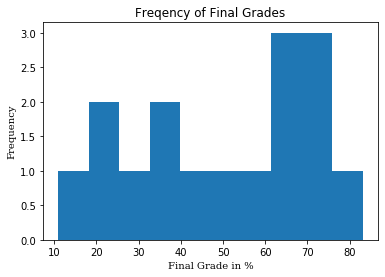

In [62]:
plt.title("Freqency of Final Grades")
plt.hist(class_num_grade)
plt.xlabel("Final Grade in %", family="serif")
plt.ylabel("Frequency", family='serif');

/Users/celinaplaza/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/celinaplaza/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


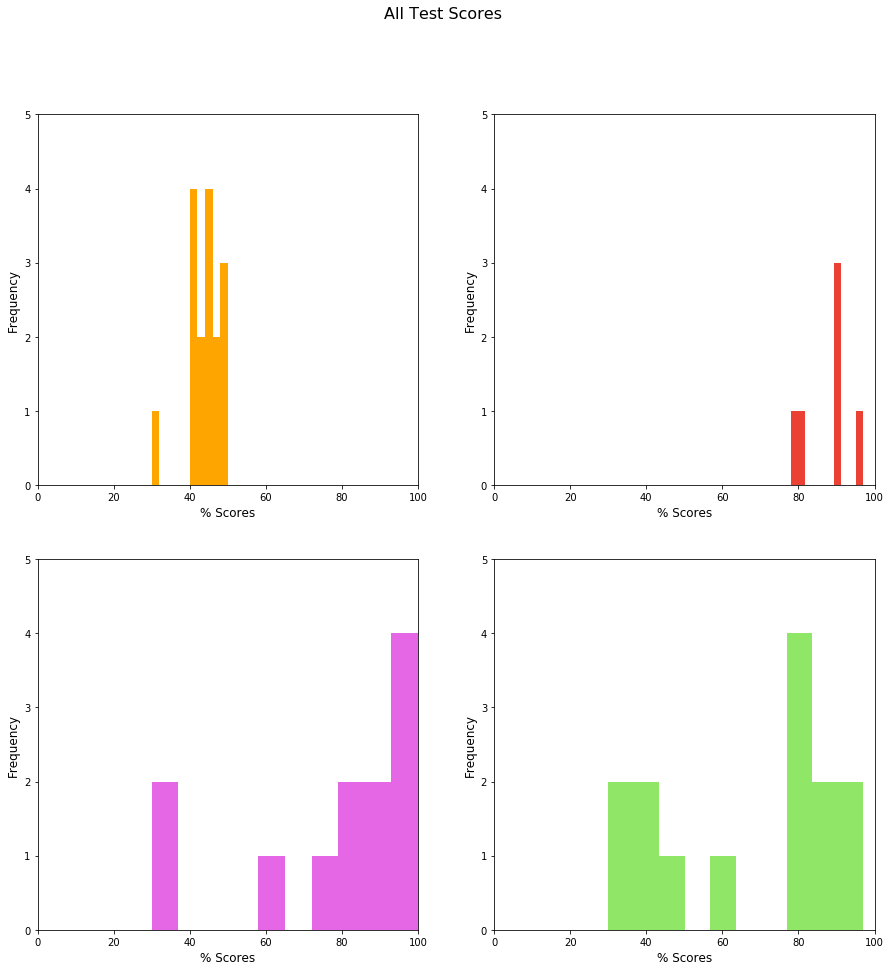

In [51]:
plt.figure(figsize=[15,15])

plt.suptitle('All Test Scores',fontsize = 16)

plt.subplot(2,2,1)
plt.hist(test1_score, color='orange')
plt.xlabel("% Scores", size=12)
plt.ylabel("Frequency", size=12)
plt.axis([0, 100, 0, 5]); 

plt.subplot(2,2,2)
plt.hist(test2_score, color='#eb4034')
plt.xlabel("% Scores", size=12)
plt.ylabel("Frequency", size=12)
plt.axis([0, 100, 0, 5]);

plt.subplot(2,2,3)
plt.hist(test3_score, color='#e667e6')
plt.xlabel("% Scores", size=12)
plt.ylabel("Frequency", size=12)
plt.axis([0, 100, 0, 5]);

plt.subplot(2,2,4)
plt.hist(test4_score, color='#8fe667')
plt.xlabel("% Scores", size=12)
plt.ylabel("Frequency", size=12)
plt.axis([0, 100, 0, 5]);

In [64]:
df_grades.loc[:,"Test1":"Final"].describe()

,Test1,Test2,Test3,Test4,Final
count,16.00000,6.000000,12.000000,14.00000,15.000000
mean,43.43750,87.500000,77.916667,67.50000,56.966667
std,4.74649,7.148426,23.925864,24.50981,20.817632
min,30.00000,78.000000,30.000000,30.00000,40.000000
25%,41.00000,82.500000,73.500000,41.25000,44.500000
50%,44.00000,90.000000,84.000000,78.50000,47.000000
75%,46.25000,90.000000,96.250000,86.75000,63.500000
max,50.00000,97.000000,100.000000,97.00000,97.000000


In [65]:
df_grades.columns

Index(['LastName', 'FirstName', 'SSN', 'Test1', 'Test2', 'Test3', 'Test4',
       'Final', 'NumberGrade', 'LetterGrade', 'ScaleGrade_Rank', 'ScaleGrade'],
      dtype='object')

In [66]:
df_grades.loc[:,['SSN','Test1']][df_grades.LetterGrade=='A']

,SSN,Test1
4,456-78-9012,43.0
9,143-12-1234,48.0


In [67]:
df_grades.groupby('LetterGrade').mean()

,Test1,Test2,Test3,Test4,Final,NumberGrade,ScaleGrade_Rank
LetterGrade,,,,,,,
A,45.500000,78.0,92.5,86.5,71.000000,67.000000,2.000000
B,45.333333,90.0,66.8,67.2,71.500000,48.316667,1.666667
C,40.500000,85.0,70.0,49.0,43.750000,44.400000,2.000000
D,41.666667,93.5,92.0,80.0,45.666667,64.400000,2.333333
F,45.000000,NaN,NaN,NaN,43.000000,20.400000,2.000000


In [69]:
smpl_norm_numgrade = np.random.normal(df_grades.NumberGrade)

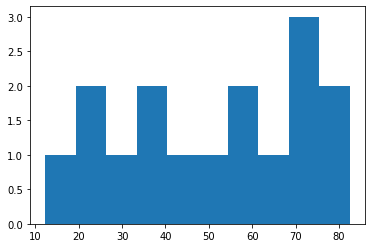

In [72]:
plt.hist(smpl_norm_numgrade);